<a href="https://colab.research.google.com/github/Amarmurun0212/Diver/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sprint Machine Learning Scratch SVM

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Create simple dataset 1

In [2]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

<ipython-input-2-22a44c733645>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)


Standardize your data

In [3]:
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()

Split into training data and validation data

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)
print(y_test)
print(X_test.shape)
print(y_test.shape)

(375, 2)
[[ 4.02167520e-01 -7.62160997e-01]
 [ 9.14520842e-01 -3.59129160e-01]
 [-2.07144508e-02 -1.55068982e+00]
 [ 9.51259416e-02 -1.49981287e+00]
 [-1.98845795e+00  3.48142760e-01]
 [ 1.05265520e+00 -3.77410096e-01]
 [ 9.50339157e-01 -1.09810107e+00]
 [ 2.32164590e-01 -1.29460202e+00]
 [ 2.47460055e-01 -8.10996145e-01]
 [-1.30954803e+00  3.80561827e-01]
 [-4.56789159e-01  1.50125626e+00]
 [ 5.72663097e-01 -1.02973160e+00]
 [ 1.15045558e+00 -4.49740998e-01]
 [ 6.15133610e-01 -9.15905888e-01]
 [ 1.20907380e+00 -4.77924422e-01]
 [-5.57642769e-01  1.30150953e+00]
 [ 2.02222035e-02  1.61472346e+00]
 [-1.81773544e-01  9.71513050e-01]
 [-1.20222203e+00  3.03000900e-01]
 [ 5.47740922e-01 -9.88164915e-01]
 [-2.05444988e+00 -3.99949728e-01]
 [ 5.91560336e-02 -1.14247280e+00]
 [-1.31129111e+00  3.17570501e-01]
 [-1.79342330e+00  1.75991043e-01]
 [-1.30384048e+00  3.67394090e-01]
 [-4.31053014e-01  1.05734222e+00]
 [-4.43152322e-01  1.46609621e+00]
 [-6.31791968e-01  1.04373146e+00]
 [ 8.894577

[Problem 1] Steepest descent by Lagrange's method of undetermined multipliers

SVM training uses the Lagrangian method of undetermined multipliers. Prepare Lagrangian multipliers $\lambda$ for the number of samples and update them using the following formula. Implement a method to do this calculation in your ScratchSVMClassifier class

[Problem 2] Determination of support vectors

Treat samples whose computed Lagrangian multiplier $\lambda$ is greater than the threshold you set as support vectors. Support vectors are required when estimating. Write code to determine the support vectors and store them as instance variables.

Threshold is a hyperparameter, but a good starting point is around 1e-5. If you can output the number of support vectors, you can check if the learning is going well.

[Question 3] Presumption

At the time of estimation, the kernel function calculates the features of the data to be estimated and the features of the support vectors. The sign of the obtained $f(x)$ is the classification result.

In [5]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """

    def __init__(self, num_iter=5, lr=0.0001, threshold=1e-5, kernel='linear',  verbose=True):
        # ハイパーパラメータを属性として記録

        self.iter = num_iter
        self.lr = lr
        self.threshold = threshold
        self.verbose = verbose
        
    # 線形カーネルを求める関数
    def karnel(self, X, i, j):
        k = np.dot(X[i].T, X[j])
        return k

    # ラムダを算出
    def generating_lam(self, X, y, lam):

        lam_old = np.zeros(lam.shape) # 元のリストをコピーしてfor文で使う
        for i in range(len(X)):
            sigma = 0
            #i = 0 # インデックスを０から始めないと、サイズ超のエラーが出る
            for j in range(len(X)):
                #j = 0
                sigma += lam[j]*y[i]*y[j]*self.karnel(X, i, j)
            lam_old[i] = lam[i] + self.lr*(1 - sigma)
            if lam_old[i] < 0:
                lam_old[i] = 0
        lam = lam_old.copy()
        return lam
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #self.N = len(X)
        #self.y = y
        lam = np.ones(len(X))

         
        # 学習
        for t in range(self.iter):
            lam = self.generating_lam(X, y, lam)
            
            if self.verbose: #verboseをTrueにした際は学習過程を出力
                print("{}回目のλ\n{}".format(t, lam))
    
        # svを決定
        # しきい値より大きいサポートベクターの位置
        self.index = np.where(lam > self.threshold)
        self.sv_lam = lam[self.index] # λn
        self.sv_f = X[self.index] # サポートベクター
        self.sv_num = len(self.sv_f) # サポートベクターの数
        self.sv_label = y[self.index] # サポートベクターのラベル
        if self.verbose: #verboseをTrueにした際は学習過程を出力
            print("svの数：{}".format(self.sv_num))


    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        
        pre_k =  np.dot(X, self.sv_f.T) 
        self.sv_lam = np.array(self.sv_lam)
        self.sv_label = np.array(self.sv_label)
        f_X =  (self.sv_label*self.sv_lam)@pre_k.T
        f_X_result = np.sign(f_X)

        return f_X_result

[Question 4] Learning and Estimation

Please learn and estimate the scratch implementation for binary classification of simple dataset 1 prepared in Sprint of Introduction to Machine Learning Scratch.

Compare it with the scikit-learn implementation to see if it works.

Please use scikit-learn for index values ​​such as Accuracy, Precision, and Recall.

In [6]:
#Use x, y to learn and estimate
SSVM = ScratchSVMClassifier(num_iter=50, lr=0.01, threshold=1e-5, kernel='linear',  verbose=True)
fit_ss  = SSVM.fit(X_train, y_train)
pre_ss = SSVM.predict(X_test)
print("SVM の推定値：{}".format(pre_ss)) 
print("テストラベル値：{}".format(y_test))

0回目のλ
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

evaluation


In [7]:
print("正解率 ：{}".format(accuracy_score(y_test, pre_ss)))
print("精度    ：{}".format(precision_score(y_test, pre_ss)))
print("検出率：{}".format(recall_score(y_test, pre_ss)))
print("F値     ：{}".format(f1_score(y_test, pre_ss)))
#print("混合行列：\n{}".format(confusion_matrix(labels_test, svm_pred)))

正解率 ：1.0
精度    ：1.0
検出率：1.0
F値     ：1.0


Estimation with SVM in sklean

In [8]:
# Learn and estimate with SVM
svm = SVC(random_state=0, gamma='scale')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print("SVM の推定値：{}".format(svm_pred)) 
print("テストラベル値：{}".format(y_test))

# evaluation
print("正解率 ：{}".format(accuracy_score(y_test, svm_pred)))
print("精度    ：{}".format(precision_score(y_test, svm_pred)))
print("検出率：{}".format(recall_score(y_test, svm_pred)))
print("F値     ：{}".format(f1_score(y_test, svm_pred)))
#print("混合行列：\n{}".format(confusion_matrix(labels_test, svm_pred)))

SVM の推定値：[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.]
テストラベル値：[-1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1.  1. 

[Problem 5] Visualization of the decision region

Visualize the decision region. Show the support vectors in different colors as in the example below.

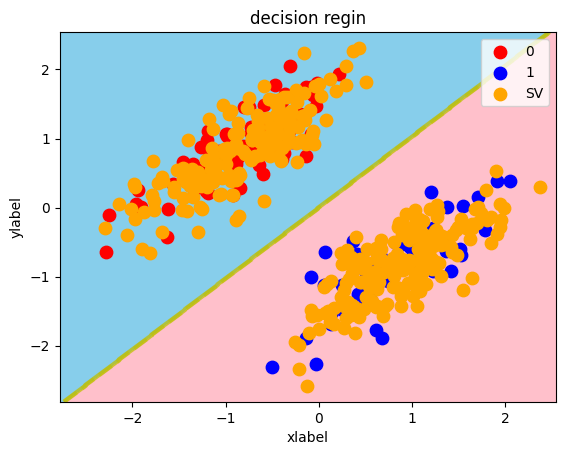

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1','sv']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue','orange']
    contourf_color = ['pink', 'skyblue']
    n_class = 3
    #sv_f = SSVM.sv_f

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.sv_f[:, 0], model.sv_f[:, 1], s=80, color=scatter_color[2], label="SV", marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
decision_region(X_test, y_test, SSVM, step=0.01, title='decision regin', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1','sv'])